# Import Libraries and Data

In [ ]:
# make imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from google.colab import drive

In [ ]:
# mount to drive
prefix = '/content/drive'
from google.colab import drive
drive.mount(prefix)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# create path to csv files
covid_path = '/content/drive/My Drive/CIS_520_Final_Project/us-counties-2020.csv'
county_health_path = '/content/drive/My Drive/CIS_520_Final_Project/county-health-rankings-data-2020.csv'

In [ ]:
# read csv files
covid_df = pd.read_csv(covid_path)
county_health_df = pd.read_csv(county_health_path, skiprows=[1])

In [ ]:
# view covid df
print(covid_df.shape)
covid_df.head()

(884737, 6)


,date,county,state,fips,cases,deaths
0,2020-01-21,Snohomish,Washington,53061.0,1,0.0
1,2020-01-22,Snohomish,Washington,53061.0,1,0.0
2,2020-01-23,Snohomish,Washington,53061.0,1,0.0
3,2020-01-24,Cook,Illinois,17031.0,1,0.0
4,2020-01-24,Snohomish,Washington,53061.0,1,0.0


In [ ]:
# view county health df
print(county_health_df.shape)
county_health_df.head()

(3194, 786)


,State FIPS Code,County FIPS Code,5-digit FIPS Code,State Abbreviation,Name,Release Year,County Ranked (Yes=1/No=0),Premature death raw value,Premature death numerator,Premature death denominator,...,Male population 18-44 raw value,Male population 45-64 raw value,Male population 65+ raw value,Total male population raw value,Female population 0-17 raw value,Female population 18-44 raw value,Female population 45-64 raw value,Female population 65+ raw value,Total female population raw value,Population growth raw value
0,0,0,0,US,United States,2020,NaN,6940.110519,3813889.0,912286150.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,0,1000,AL,Alabama,2020,NaN,9942.794666,81791.0,13640424.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,1,1001,AL,Autauga County,2020,1.0,8128.591190,791.0,155856.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,3,1003,AL,Baldwin County,2020,1.0,7354.122530,2967.0,588433.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1,5,1005,AL,Barbour County,2020,1.0,10253.573403,472.0,70435.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Process Covid Data

In [ ]:
# drop county, and state
covid_df = covid_df.drop(columns=['county', 'state'])

# drop nans
covid_df = covid_df.dropna()

In [ ]:
# add 14 empty rows for each county
to_append = []
covid_df = covid_df.assign(temp=0)
for fips in covid_df.fips.unique():
    for i in range(14):
        to_append.append([np.nan, fips, 0, 0, np.nan])

covid_df = covid_df.append(pd.DataFrame(to_append, columns=['date', 'fips', 'cases', 'deaths', 'temp']))

# sort by fips and date, drop date, and convert to numpy array
covid_np = covid_df.sort_values(by=['fips', 'date'], na_position='first').drop(columns=['date']).to_numpy()

In [ ]:
# add data from previous 14 days
to_concat = []
for i in range(14):
    to_concat.insert(0, covid_np[i:len(covid_np)+i-14, 1:3])

covid_np = covid_np[14:]
for x in to_concat:
    covid_np = np.hstack((covid_np, x))

covid_np = covid_np[~np.isnan(covid_np).any(axis=1)]
covid_np = np.delete(covid_np, 3, axis=1)

In [ ]:
# convert total count to change in count
for i in range(28):
    covid_np[:, i+1] -= covid_np[:, i+3]

covid_np = covid_np[:, :-2]

In [ ]:
# convert to pandas df
cols = ['fips']
for i in range(14):
    cols.append('cases_%s' % i)
    cols.append('deaths_%s' % i)

covid_df = pd.DataFrame(covid_np, columns=cols)

In [ ]:
# view covid df
print(covid_df.shape)
covid_df.head()

(857710, 29)


,fips,cases_0,deaths_0,cases_1,deaths_1,cases_2,deaths_2,cases_3,deaths_3,cases_4,...,cases_9,deaths_9,cases_10,deaths_10,cases_11,deaths_11,cases_12,deaths_12,cases_13,deaths_13
0,1001.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1001.0,3.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1001.0,2.0,0.0,3.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1001.0,0.0,0.0,2.0,0.0,3.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1001.0,0.0,0.0,0.0,0.0,2.0,0.0,3.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
# describe cases
covid_df['cases_0'].describe()

count    857710.000000
mean         22.602747
std         134.046154
min       -2321.000000
25%           0.000000
50%           2.000000
75%          12.000000
max       29174.000000
Name: cases_0, dtype: float64

In [ ]:
# find where new cases are negative
neg_cases_df = covid_df.loc[covid_df['cases_0'] < 0]
print(neg_cases_df.shape)
neg_cases_df.head()

(13288, 29)


,fips,cases_0,deaths_0,cases_1,deaths_1,cases_2,deaths_2,cases_3,deaths_3,cases_4,...,cases_9,deaths_9,cases_10,deaths_10,cases_11,deaths_11,cases_12,deaths_12,cases_13,deaths_13
25,1001.0,-1.0,0.0,1.0,0.0,0.0,1.0,2.0,0.0,4.0,...,5.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
37,1001.0,-1.0,0.0,3.0,0.0,1.0,1.0,2.0,1.0,0.0,...,2.0,0.0,1.0,-1.0,2.0,0.0,-1.0,0.0,1.0,0.0
52,1001.0,-1.0,0.0,11.0,0.0,2.0,0.0,7.0,0.0,10.0,...,5.0,0.0,0.0,0.0,5.0,0.0,3.0,0.0,3.0,0.0
140,1001.0,-7.0,1.0,5.0,0.0,83.0,0.0,21.0,0.0,17.0,...,22.0,0.0,15.0,0.0,13.0,0.0,15.0,0.0,13.0,0.0
162,1001.0,-1.0,0.0,11.0,1.0,4.0,0.0,38.0,0.0,11.0,...,27.0,0.0,2.0,0.0,9.0,0.0,15.0,0.0,0.0,0.0


In [ ]:
# look at original data set to check if there is noise in dataset
# take fips 1001 on day 26 as example
orig_covid_df = pd.read_csv(covid_path)
orig_covid_df.loc[orig_covid_df['fips'] == 1001][24:27]

,date,county,state,fips,cases,deaths
64616,2020-04-17,Autauga,Alabama,1001.0,26,2.0
67364,2020-04-18,Autauga,Alabama,1001.0,25,2.0
70126,2020-04-19,Autauga,Alabama,1001.0,27,2.0


In [ ]:
# look at how many rows have noise
neg_cases_df = covid_df.iloc[np.where((covid_df.iloc[:, 1:29] < 0).any(axis=1).values)]
print(neg_cases_df.shape)
neg_cases_df.head()

(178081, 29)


,fips,cases_0,deaths_0,cases_1,deaths_1,cases_2,deaths_2,cases_3,deaths_3,cases_4,...,cases_9,deaths_9,cases_10,deaths_10,cases_11,deaths_11,cases_12,deaths_12,cases_13,deaths_13
25,1001.0,-1.0,0.0,1.0,0.0,0.0,1.0,2.0,0.0,4.0,...,5.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
26,1001.0,2.0,0.0,-1.0,0.0,1.0,0.0,0.0,1.0,2.0,...,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
27,1001.0,1.0,-1.0,2.0,0.0,-1.0,0.0,1.0,0.0,0.0,...,2.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0
28,1001.0,2.0,0.0,1.0,-1.0,2.0,0.0,-1.0,0.0,1.0,...,0.0,0.0,2.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0
29,1001.0,2.0,1.0,2.0,0.0,1.0,-1.0,2.0,0.0,-1.0,...,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,5.0,0.0


In [ ]:
# get rid of all rows with noise
covid_df = covid_df.iloc[np.where((covid_df.iloc[:, 1:29] >= 0).all(axis=1).values)]
print(covid_df.shape)
covid_df.head()

(679629, 29)


,fips,cases_0,deaths_0,cases_1,deaths_1,cases_2,deaths_2,cases_3,deaths_3,cases_4,...,cases_9,deaths_9,cases_10,deaths_10,cases_11,deaths_11,cases_12,deaths_12,cases_13,deaths_13
0,1001.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1001.0,3.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1001.0,2.0,0.0,3.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1001.0,0.0,0.0,2.0,0.0,3.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1001.0,0.0,0.0,0.0,0.0,2.0,0.0,3.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
# describe cases increase series
covid_df['cases_0'].describe()

count    679629.000000
mean         24.894747
std         145.798209
min           0.000000
25%           0.000000
50%           3.000000
75%          14.000000
max       29174.000000
Name: cases_0, dtype: float64

# Process County Health Data

In [ ]:
# view county health df
print(county_health_df.shape)
county_health_df.head()

(3194, 786)


,State FIPS Code,County FIPS Code,5-digit FIPS Code,State Abbreviation,Name,Release Year,County Ranked (Yes=1/No=0),Premature death raw value,Premature death numerator,Premature death denominator,...,Male population 18-44 raw value,Male population 45-64 raw value,Male population 65+ raw value,Total male population raw value,Female population 0-17 raw value,Female population 18-44 raw value,Female population 45-64 raw value,Female population 65+ raw value,Total female population raw value,Population growth raw value
0,0,0,0,US,United States,2020,NaN,6940.110519,3813889.0,912286150.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,0,1000,AL,Alabama,2020,NaN,9942.794666,81791.0,13640424.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,1,1001,AL,Autauga County,2020,1.0,8128.591190,791.0,155856.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,3,1003,AL,Baldwin County,2020,1.0,7354.122530,2967.0,588433.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1,5,1005,AL,Barbour County,2020,1.0,10253.573403,472.0,70435.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


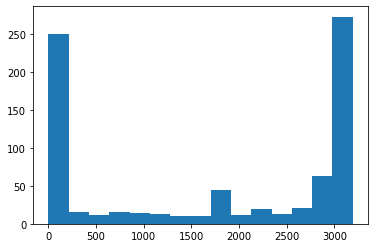

In [ ]:
# view county health data na distribution
plt.hist(county_health_df.isnull().sum(axis = 0), bins=15)
plt.show()

In [ ]:
# drop columns with more than 200 nas
county_health_df = county_health_df.dropna(thresh=len(county_health_df) - 200, axis=1)

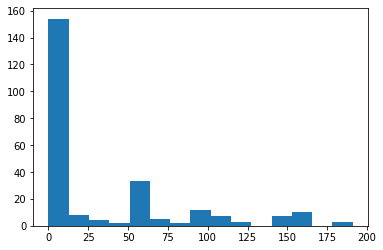

In [ ]:
# view county health data na distribution
plt.hist(county_health_df.isnull().sum(axis = 0), bins=15)
plt.show()

In [ ]:
# drop columns with more than 50 nas
county_health_df = county_health_df.dropna(thresh=len(county_health_df) - 50, axis=1)

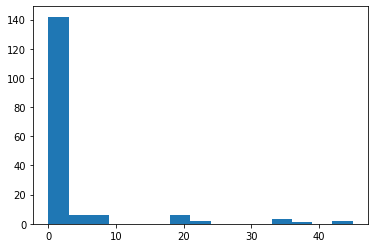

In [ ]:
# view county health data na distribution
plt.hist(county_health_df.isnull().sum(axis = 0), bins=15)
plt.show()

In [ ]:
# drop remaining nas and view remaining columns
county_health_df = county_health_df.dropna()
print(county_health_df.columns.values)

['State FIPS Code' 'County FIPS Code' '5-digit FIPS Code'
 'State Abbreviation' 'Name' 'Release Year'
 'Premature death flag (0 = No Flag/1=Unreliable/2=Suppressed)'
 'Poor or fair health raw value' 'Poor or fair health CI low'
 'Poor or fair health CI high' 'Poor physical health days raw value'
 'Poor physical health days CI low' 'Poor physical health days CI high'
 'Poor mental health days raw value' 'Poor mental health days CI low'
 'Poor mental health days CI high'
 'LBW unreliable indicator (Unreliable = Numerator < 20 or relative standard error > 20%)'
 'Adult smoking raw value' 'Adult smoking CI low' 'Adult smoking CI high'
 'Adult obesity raw value' 'Adult obesity numerator'
 'Food environment index raw value' 'Food environment index numerator'
 'Food environment index denominator' 'Physical inactivity raw value'
 'Physical inactivity numerator'
 'Access to exercise opportunities raw value'
 'Access to exercise opportunities numerator'
 'Access to exercise opportunities denomin

In [ ]:
# view county health df
print(county_health_df.shape)
county_health_df.head()

(3039, 168)


,State FIPS Code,County FIPS Code,5-digit FIPS Code,State Abbreviation,Name,Release Year,Premature death flag (0 = No Flag/1=Unreliable/2=Suppressed),Poor or fair health raw value,Poor or fair health CI low,Poor or fair health CI high,...,% Non-Hispanic White denominator,% not proficient in English raw value,% not proficient in English numerator,% not proficient in English denominator,% Females raw value,% Females numerator,% Females denominator,% Rural raw value,% Rural numerator,% Rural denominator
1,1,0,1000,AL,Alabama,2020,0,0.220287,0.207434,0.233701,...,4887871,0.010610,48517,4572555,0.516330,2523756,4887871,0.409632,1957932.0,4779736.0
2,1,1,1001,AL,Autauga County,2020,0,0.208830,0.202523,0.214992,...,55601,0.008202,426,51937,0.514487,28606,55601,0.420022,22921.0,54571.0
3,1,3,1003,AL,Baldwin County,2020,0,0.175091,0.170242,0.180177,...,218022,0.005435,1068,196498,0.515384,112365,218022,0.422791,77060.0,182265.0
4,1,5,1005,AL,Barbour County,2020,0,0.295918,0.287989,0.303947,...,24881,0.016317,398,24392,0.472168,11748,24881,0.677896,18613.0,27457.0
5,1,7,1007,AL,Bibb County,2020,0,0.194397,0.187628,0.200721,...,22400,0.002682,57,21252,0.467813,10479,22400,0.683526,15663.0,22915.0


In [ ]:
# perform onehot encoding and drop unecessary columns
state_encoding = pd.get_dummies(county_health_df['State Abbreviation'], prefix=['State Abbreviation'])
premature_encoding = pd.get_dummies(county_health_df['Premature death flag (0 = No Flag/1=Unreliable/2=Suppressed)'], prefix=['Premature death flag (0 = No Flag/1=Unreliable/2=Suppressed)'])
concat = pd.concat([state_encoding, premature_encoding], axis=1)

to_drop = [
    'State FIPS Code',
    'County FIPS Code',
    'State Abbreviation',
    'Name',
    'Release Year',
    'Premature death flag (0 = No Flag/1=Unreliable/2=Suppressed)',
    'Ratio of population to primary care providers other than physicians.'
]

county_health_df = pd.concat([county_health_df, concat], axis=1).drop(columns=to_drop)

In [ ]:
# drop numerators and denominators
county_health_df = county_health_df[county_health_df.columns[~county_health_df.columns.str.endswith('numerator')]]
county_health_df = county_health_df[county_health_df.columns[~county_health_df.columns.str.endswith('denominator')]]

In [ ]:
# view county health df
print(county_health_df.shape)
county_health_df.head()

(3039, 144)


,5-digit FIPS Code,Poor or fair health raw value,Poor or fair health CI low,Poor or fair health CI high,Poor physical health days raw value,Poor physical health days CI low,Poor physical health days CI high,Poor mental health days raw value,Poor mental health days CI low,Poor mental health days CI high,...,['State Abbreviation']_UT,['State Abbreviation']_VA,['State Abbreviation']_VT,['State Abbreviation']_WA,['State Abbreviation']_WI,['State Abbreviation']_WV,['State Abbreviation']_WY,['Premature death flag (0 = No Flag/1=Unreliable/2=Suppressed)']_0,['Premature death flag (0 = No Flag/1=Unreliable/2=Suppressed)']_1,['Premature death flag (0 = No Flag/1=Unreliable/2=Suppressed)']_2
1,1000,0.220287,0.207434,0.233701,4.918052,4.599799,5.236304,4.939753,4.595322,5.284183,...,0,0,0,0,0,0,0,1,0,0
2,1001,0.208830,0.202523,0.214992,4.743889,4.564332,4.916272,4.654031,4.464817,4.839471,...,0,0,0,0,0,0,0,1,0,0
3,1003,0.175091,0.170242,0.180177,4.224519,4.075200,4.381421,4.304056,4.133483,4.468240,...,0,0,0,0,0,0,0,1,0,0
4,1005,0.295918,0.287989,0.303947,5.430279,5.251462,5.602304,5.185594,5.010361,5.355826,...,0,0,0,0,0,0,0,1,0,0
5,1007,0.194397,0.187628,0.200721,4.591482,4.407223,4.769054,4.551699,4.357338,4.734401,...,0,0,0,0,0,0,0,1,0,0


# Merge Covid and County Health Data

In [ ]:
# merge dataframes
data_df = pd.merge(covid_df, county_health_df, left_on=['fips'], right_on=['5-digit FIPS Code']).drop(columns=['5-digit FIPS Code'])

In [ ]:
# drop deaths_0 and fips
data_df = data_df.drop(columns=['fips', 'deaths_0'])

In [ ]:
# view data
print(data_df.shape)
data_df.head()

(649442, 170)


,cases_0,cases_1,deaths_1,cases_2,deaths_2,cases_3,deaths_3,cases_4,deaths_4,cases_5,...,['State Abbreviation']_UT,['State Abbreviation']_VA,['State Abbreviation']_VT,['State Abbreviation']_WA,['State Abbreviation']_WI,['State Abbreviation']_WV,['State Abbreviation']_WY,['Premature death flag (0 = No Flag/1=Unreliable/2=Suppressed)']_0,['Premature death flag (0 = No Flag/1=Unreliable/2=Suppressed)']_1,['Premature death flag (0 = No Flag/1=Unreliable/2=Suppressed)']_2
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,1,0,0
1,3.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,1,0,0
2,2.0,3.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,1,0,0
3,0.0,2.0,0.0,3.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,1,0,0
4,0.0,0.0,0.0,2.0,0.0,3.0,0.0,1.0,0.0,0.0,...,0,0,0,0,0,0,0,1,0,0


# Distribution of Features

In [ ]:
# get a couple of columns to examine
cases = data_df['cases_1'].values
deaths = data_df['deaths_1'].values
raw_val = data_df['Homeownership raw value'].values
CI_low = data_df['Homeownership CI low'].values
CI_high = data_df['Homeownership CI high'].values

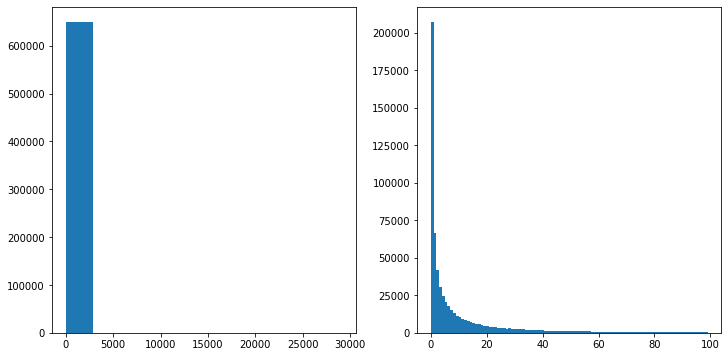

In [ ]:
# view the distribution of cases
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
ax1.hist(cases, 10)
ax2.hist(cases[cases<100], 100)
plt.show()

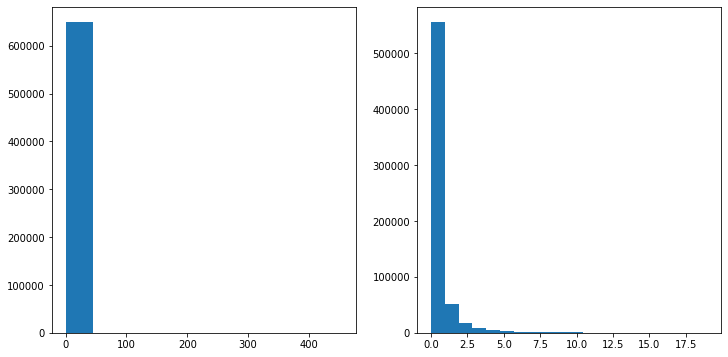

In [ ]:
# view the distribution of deaths
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
ax1.hist(deaths, 10)
ax2.hist(deaths[deaths<20], 20)
plt.show()

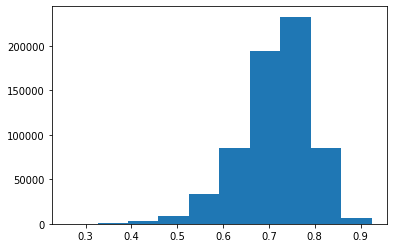

In [ ]:
# view the distribution of raw values
plt.hist(raw_val)
plt.show()

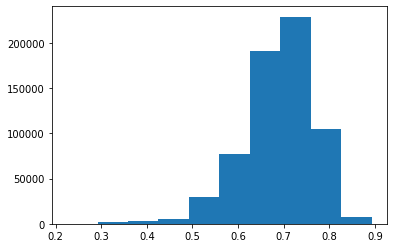

In [ ]:
# view the distribution of low confidence interval bounds
plt.hist(CI_low)
plt.show()

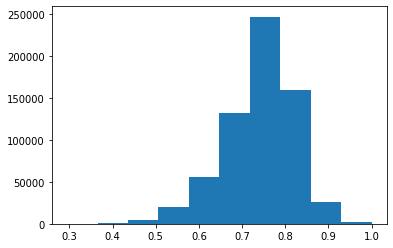

In [ ]:
# view the distribution of high confidence interval bounds
plt.hist(CI_high)
plt.show()

# Export Data

In [ ]:
# export 5% of the data
data_df.sample(frac=0.05, random_state=42).to_csv('/content/drive/My Drive/CIS_520_Final_Project/partial_data.csv', index=False)

In [ ]:
# # export all of the data
# data_df.to_csv('/content/drive/My Drive/CIS_520_Final_Project/data.csv', index=False)